<a href="https://colab.research.google.com/github/KunChen-tw/DeepLearning/blob/main/deeplearning1005_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand-written Digits recognition(手寫辨識)

In [3]:
import os
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torchvision.datasets import MNIST

PATH_DATASETS = ""
BATCH_SIZE = 1024
# 偵測目前電腦是否有 cuda 可以跑，若沒有的話，用 CPU 跑
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# download MNIST training data at the same directory with current program file
train_ds = MNIST(PATH_DATASETS, train=True, download=True,
                 transform=transforms.ToTensor()) # transforms.ToTensor() 將像素範圍 0~255 轉換成 0~1

# download MNIST test data
test_ds = MNIST(PATH_DATASETS, train=False, download=True,
                 transform=transforms.ToTensor())

# the shape of training data and test data
print(train_ds.data.shape, test_ds.data.shape)
print(train_ds.targets.shape, test_ds.targets.shape)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 19886452.45it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 605233.62it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 5558258.88it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 11981464.63it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])
torch.Size([60000]) torch.Size([10000])


# 顯示一張圖

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4])


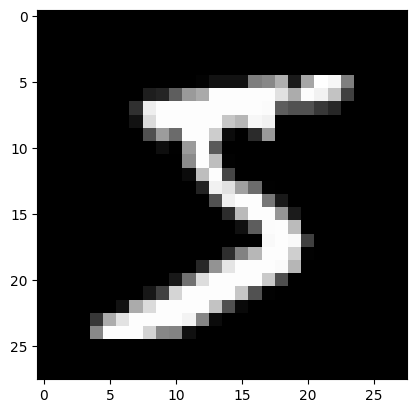

In [4]:
print(train_ds.targets[:10])

import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

import matplotlib.pyplot as plt

X = train_ds.data[0] # without normalization

plt.imshow(X.reshape(28,28), cmap='gray')

plt.show()


In [5]:
# Create model
model = torch.nn.Sequential(
    torch.nn.Flatten(), # 將二維短陣轉成一維矩陣
    torch.nn.Linear(28 * 28, 256),
    torch.nn.Linear(256, 10),
).to(device)

epochs = 5
lr=0.1

# Create DataLoader
train_loader = DataLoader(train_ds, batch_size=600)  #batch_size=600 表示一次同時處理600張資料

# Set optimizer
optimizer = torch.optim.Adadelta(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

model.train() # set the model to training mode
loss_list = []

for epoch in range(1, epochs + 1):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device) # 設定資料在 CPU 還是 GPU 跑

        optimizer.zero_grad()
        output = model(data)

        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 10 == 0:
            loss_list.append(loss.item())
            batch = batch_idx * len(data)
            data_count = len(train_loader.dataset)
            percentage = (100. * batch_idx / len(train_loader))
            print(f'Epoch {epoch}: [{batch:5d} / {data_count}] ({percentage:.0f} %)' +
                  f'  Loss: {loss.item():.6f}')


Epoch 1: [    0 / 60000] (0 %)  Loss: 2.301491
Epoch 1: [ 6000 / 60000] (10 %)  Loss: 1.996988
Epoch 1: [12000 / 60000] (20 %)  Loss: 1.773235
Epoch 1: [18000 / 60000] (30 %)  Loss: 1.553150
Epoch 1: [24000 / 60000] (40 %)  Loss: 1.317747
Epoch 1: [30000 / 60000] (50 %)  Loss: 1.213984
Epoch 1: [36000 / 60000] (60 %)  Loss: 0.970798
Epoch 1: [42000 / 60000] (70 %)  Loss: 0.945073
Epoch 1: [48000 / 60000] (80 %)  Loss: 0.694541
Epoch 1: [54000 / 60000] (90 %)  Loss: 0.711511
Epoch 2: [    0 / 60000] (0 %)  Loss: 0.671602
Epoch 2: [ 6000 / 60000] (10 %)  Loss: 0.525755
Epoch 2: [12000 / 60000] (20 %)  Loss: 0.626637
Epoch 2: [18000 / 60000] (30 %)  Loss: 0.538093
Epoch 2: [24000 / 60000] (40 %)  Loss: 0.564217
Epoch 2: [30000 / 60000] (50 %)  Loss: 0.611156
Epoch 2: [36000 / 60000] (60 %)  Loss: 0.492979
Epoch 2: [42000 / 60000] (70 %)  Loss: 0.593161
Epoch 2: [48000 / 60000] (80 %)  Loss: 0.404545
Epoch 2: [54000 / 60000] (90 %)  Loss: 0.453361
Epoch 3: [    0 / 60000] (0 %)  Loss: 0.44

Average_loss: 0.0000, correct_rate: 9058/10000 (91%)



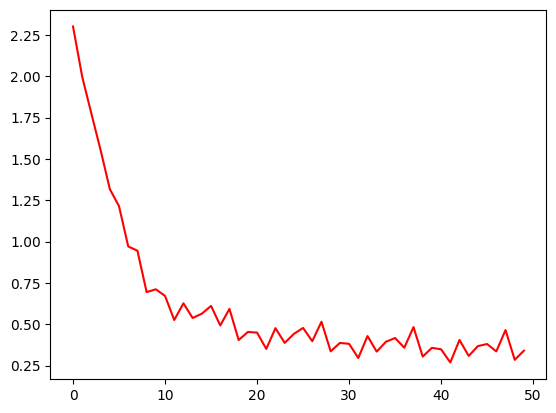

In [6]:
import matplotlib.pyplot as plt
plt.plot(loss_list, 'r')

test_loader = DataLoader(test_ds, shuffle=False, batch_size=test_ds.targets.shape[0]) # shuffle=False 資料不打亂

model.eval()
test_loss = 0
correct = 0
for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = model(data)

    # sum up batch loss
    test_loss += criterion(output, target).item()
    pred = output.argmax(dim=1)
    correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
batch = batch_idx * len(data)
data_count = len(test_loader.dataset)
percentage = 100. * correct / data_count
print(f'Average_loss: {test_loss:.4f}, correct_rate: {correct}/{data_count}' +
      f' ({percentage:.0f}%)\n')


In [7]:
predictions = []
with torch.no_grad():
    for i in range(20):
        data, target = test_ds[i][0], test_ds[i][1]
        data = data.reshape(1, *data.shape).to(device) # *:Unpack the list into independent parameters
        output = torch.argmax(model(data), axis=-1)
        predictions.append(str(output.item()))

print('actual    :', test_ds.targets[0:20].numpy())
print('prediction: ', ' '.join(predictions[0:20]))

import numpy as np

i=8 # 取第8筆資料
data = test_ds[i][0]
data = data.reshape(1, *data.shape).to(device) # *:Unpack the list into independent parameters

#print(data.shape)
predictions = torch.softmax(model(data), dim=1)
print(f'0~9 predict rate: {np.around(predictions.cpu().detach().numpy(), 2)}')
print(f'0~9 predict rate: {np.argmax(predictions.cpu().detach().numpy(), axis=-1)}')


actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
prediction:  7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4
0~9 predict rate: [[0.01 0.   0.03 0.   0.03 0.01 0.9  0.   0.01 0.  ]]
0~9 predict rate: [6]


# 將之前訓練的模型儲存下來


In [8]:

# save model
torch.save(model, 'model.pt')

# load model
model = torch.load('model.pt')

# save weights
torch.save(model.state_dict(), 'model.pth')
# model.state_dict(), using dictionary to represent parameters of model
# load weights
model.load_state_dict(torch.load('model.pth'))

# show state_dict of each dimension
print("The state_dict of each layer:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())



The state_dict of each layer:
1.weight 	 torch.Size([256, 784])
1.bias 	 torch.Size([256])
2.weight 	 torch.Size([10, 256])
2.bias 	 torch.Size([10])


<ipython-input-8-9a423c170394>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('model.pt')
<ipython-input-8-9a423c170394>:11: FutureWarning: You are usin

# 真實手寫資料，將手寫資料放到 myDigits

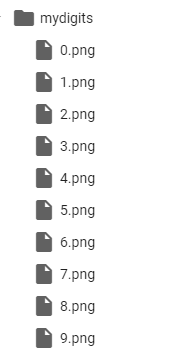

In [9]:
from skimage import io
from skimage.transform import resize
import numpy as np

for i in range(10):
    uploaded_file = f'./mydigits/{i}.png'
    image1 = io.imread(uploaded_file, as_gray=True)

    # resize to (28, 28)
    image_resized = resize(image1, (28, 28), anti_aliasing=True)
    X1 = image_resized.reshape(1,28, 28)

    # reverse to color (255->0, 0->255
    X1 = torch.FloatTensor(1.0-X1).to(device)

    # predict
    predictions = torch.softmax(model(X1), dim=1)
    print(f'actual/prediction: {i} {np.argmax(predictions.detach().cpu().numpy())}')


actual/prediction: 0 2
actual/prediction: 1 1
actual/prediction: 2 2
actual/prediction: 3 0
actual/prediction: 4 4
actual/prediction: 5 5
actual/prediction: 6 6
actual/prediction: 7 1
actual/prediction: 8 8
actual/prediction: 9 8
